# Graphs and Matrices

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Networkx

In [2]:
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(range(9))
G.add_edges_from([(0, 3),
  (1, 3),
  (1, 6),
  (2, 4),
  (3, 4),
  (5, 6),
  (6, 8),
  (7, 8),
  (7, 9)])

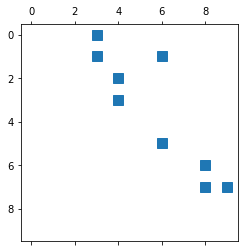

In [3]:
M = nx.adjacency_matrix(G)
plt.spy(M)

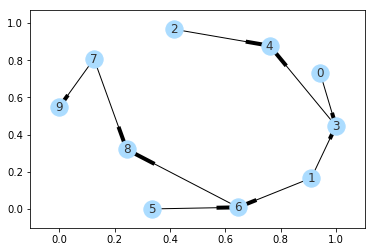

In [4]:
nx.draw_networkx(G, node_color="#ABDCFF", font_color="#333333", pos=nx.spring_layout(G))

In [5]:
nx.topological_sort(G)

[7, 9, 5, 2, 1, 6, 8, 0, 3, 4]

### Graph Generators

In [6]:
G = nx.watts_strogatz_graph(10, 2, 0.6)
[G.edges(), G.nodes()]

[[(0, 4),
  (1, 7),
  (2, 7),
  (3, 4),
  (3, 9),
  (4, 5),
  (5, 9),
  (6, 7),
  (7, 9),
  (8, 9)],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

### Adjacency Matrix

In [7]:
import scipy.sparse as sps
M = nx.adjacency_matrix(G)
M

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [8]:
M.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 1, 1, 0]], dtype=int64)

In [9]:
(M.data, M.indices)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([4, 7, 7, 4, 9, 0, 3, 5, 4, 9, 7, 1, 2, 6, 9, 9, 3, 5, 7, 8], dtype=int32))

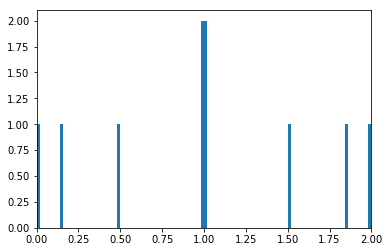

In [10]:
import numpy.linalg
L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)
plt.hist(e,bins=100) # histogram with 100 bins
plt.xlim(0,2)  # eigenvalues between 0 and 2
plt.show()

---

## Sparse Matrices

In [11]:
import numpy as np
import scipy.sparse as sps

%matplotlib inline
import matplotlib.pyplot as plt

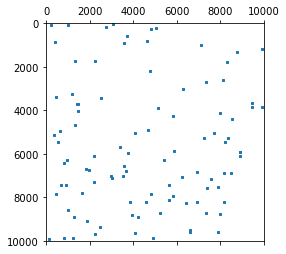

In [12]:
A = sps.rand(10000, 10000, density=0.000001)
M = sps.csr_matrix(A)
plt.spy(M, precision=0.01, markersize=2)

In [13]:
B = sps.rand(5, 5, density=0.2)
B.todense()

matrix([[ 0.        ,  0.        ,  0.31121526,  0.        ,  0.46340545],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.80120465,  0.        ],
        [ 0.        ,  0.        ,  0.76148198,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.44692161,  0.        ]])

In [14]:
C = sps.csr_matrix(B)
[C.data, C.indices]

[array([ 0.31121526,  0.46340545,  0.80120465,  0.76148198,  0.44692161]),
 array([2, 4, 3, 2, 3], dtype=int32)]

In [15]:
D = sps.csc_matrix(B)
[D.data, D.indices]

[array([ 0.31121526,  0.76148198,  0.80120465,  0.44692161,  0.46340545]),
 array([0, 3, 2, 4, 0], dtype=int32)]

---

## Graphs - Transitive Closure

Only as an intuition, dirty sample ahead!

http://www.ics.uci.edu/~irani/w15-6B/BoardNotes/MatrixMultiplication.pdf

In [16]:
from numpy import matrix, linalg
Q = matrix([[1,1,0,0,0,0], [0,1,1,1,0,0], [0,0,1,0,0,0], [0,0,0,1,0,0], [0,0,0,0,1,1], [0,0,0,0,1,0]])
Q

matrix([[1, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0]])

In [17]:
Q*Q

matrix([[1, 2, 1, 1, 0, 0],
        [0, 1, 2, 2, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 2, 1],
        [0, 0, 0, 0, 1, 1]])

In [18]:
Q[0,5] = 1
Q*Q

matrix([[1, 2, 1, 1, 1, 1],
        [0, 1, 2, 2, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 2, 1],
        [0, 0, 0, 0, 1, 1]])

---

# Singular Value Decomposition

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

In [19]:
import pandas as pd

sources = ['post1', 'post2', 'post3', 'post4']
words = ['españa', 'holanda', 'caceres', 'francia', 'italia']

P = matrix([
    [4, 4, 6, 2],
    [6, 1, 0, 5],
    [3, 0, 0, 5],
    [0, 6, 5, 1],
    [0, 4, 5, 0]])

S = pd.DataFrame(P.T, index = sources, columns = words)
S.index.names = ['word:']
S

,españa,holanda,caceres,francia,italia
word:,,,,,
post1,4,6,3,0,0
post2,4,1,0,6,4
post3,6,0,0,5,5
post4,2,5,5,1,0


$r = S \cdot q^T$

In [20]:
S.dot([1, 0, 0, 0, 0]).sort_values(ascending = False)

word:
post3    6
post2    4
post1    4
post4    2
dtype: int64

La matriz $A$ se descompone en otras tres matrices $U$, $\sigma$ y $V$ tal que $A = U \Sigma V$.

In [21]:
from numpy.linalg import svd
U, sigma, V = svd(S)
sigma

array([ 13.3221948 ,   9.2609512 ,   2.41918664,   1.37892883])

In [22]:
np.diag(sigma[:2])

array([[ 13.3221948,   0.       ],
       [  0.       ,   9.2609512]])

In [23]:
O = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
O

matrix([[ 3.19708412,  5.61979298,  4.04394318,  0.68211703,  0.12939801],
        [ 4.81855605,  0.58820097,  0.07166455,  5.08962774,  4.21952303],
        [ 5.32573599,  0.38467542, -0.12363886,  5.76212157,  4.79918534],
        [ 2.79267497,  5.41220366,  3.91701473,  0.33649133, -0.14394602]])

In [24]:
[S.shape, O.shape]

[(4, 5), (4, 5)]

In [25]:
O.dot([1, 0, 0, 0, 0])

matrix([[ 3.19708412,  4.81855605,  5.32573599,  2.79267497]])

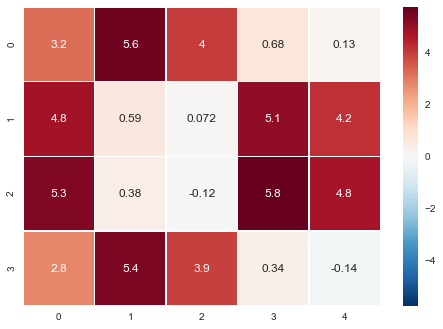

In [26]:
import seaborn as sns
sns.heatmap(O, annot=True, linewidths=.5)

In [27]:
S

,españa,holanda,caceres,francia,italia
word:,,,,,
post1,4,6,3,0,0
post2,4,1,0,6,4
post3,6,0,0,5,5
post4,2,5,5,1,0
